### Ejercicio 5: Introducción a la optimización

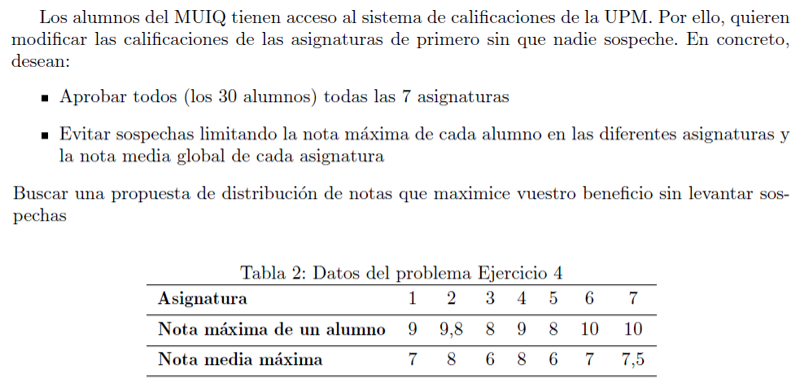

In [2]:
from IPython.display import Image 
Image(filename='img_enun/E4.png')

#### Importamos Pyomo

In [3]:
from pyomo.environ import *
import pandas as pd


In [4]:
df = pd.read_excel('Datos/Datos_Ejercicio4.xlsx')
df

,Asignatura,Nota_max,Nota_media
0,1,9.0,7.0
1,2,9.8,8.0
2,3,8.0,6.0
3,4,9.0,8.0
4,5,8.0,6.0
5,6,10.0,7.0
6,7,10.0,7.5


#### Creamos un problema concreto, es decir, un objeto de la clase problema que ya contenga parámetros

In [6]:
model = ConcreteModel()

#### Necesitamos utilizar sets

In [7]:
alumnos=range(30)
asignaturas=range(7)


In [8]:
model.alum=Set(initialize=alumnos)
model.asig=Set(initialize=asignaturas)


#### Definimos las variables

In [9]:
model.NotaAlum=Var(model.alum,model.asig,within=PositiveReals)


#### Definimos la función objetivo

In [10]:
model.obj = Objective(expr = sum(model.NotaAlum[a,b] for a in model.alum for b in model.asig), sense=maximize)

#### Definimos la restricciones

In [11]:
model.maxnota = ConstraintList()
for a in model.alum:
    for b in model.asig:
        model.maxnota.add(
            model.NotaAlum[a,b]<=df.Nota_max[b]
        )

In [12]:
model.medianota = ConstraintList()
for b in model.asig:
    model.medianota.add(
        sum(model.NotaAlum[a,b] for a in model.alum)/30<=df.Nota_media[b]
    )

In [13]:
model.minnotaalum= ConstraintList()
for a in model.alum:
    for b in model.asig:
        model.minnotaalum.add(
            model.NotaAlum[a,b]>=5
        )

#### Resolvemos el problema

In [14]:
results = SolverFactory('glpk').solve(model)
model.pprint()
results.write()   

6 Set Declarations
    NotaAlum_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain    : Size : Members
        None :     2 : alum*asig :  210 : {(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (10, 0), (10, 1), (10, 2), (10, 3), (10, 4), (10, 5), (10, 6), (11, 0), (11, 1), (11, 2), (11, 3), (11, 4), (11, 5), (11, 6), (12, 0), (12, 1), (12, 2), (12, 3), (12, 4), (12, 5), (12, 6), (13, 0), (13, 1), (13, 2), (13, 3), (13, 4), (13, 5), (13, 6), (14, 0), (14, 1), (14,

#### Exportamos a Excel

In [15]:
df2=pd.DataFrame.from_dict(model.NotaAlum.extract_values(),orient='index')
df2.to_excel('Resultados/Result_Ej4.xlsx')

In [16]:
print(asignaturas)

range(0, 7)


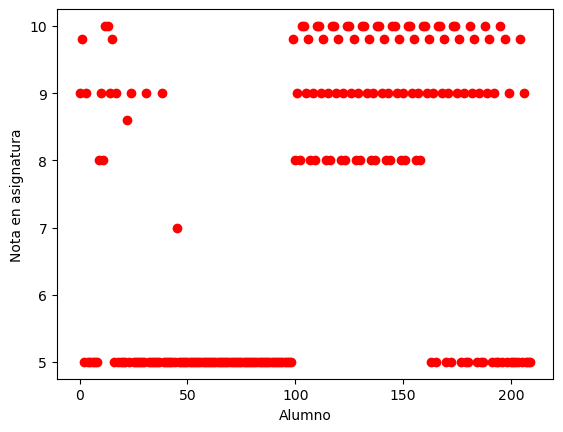

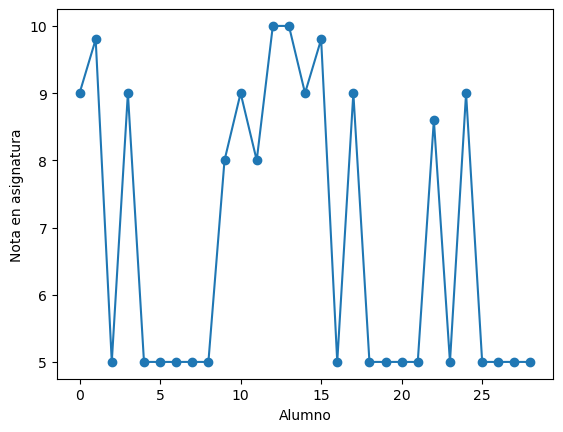

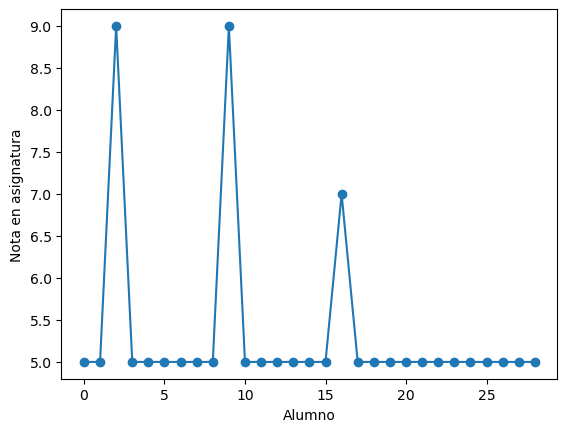

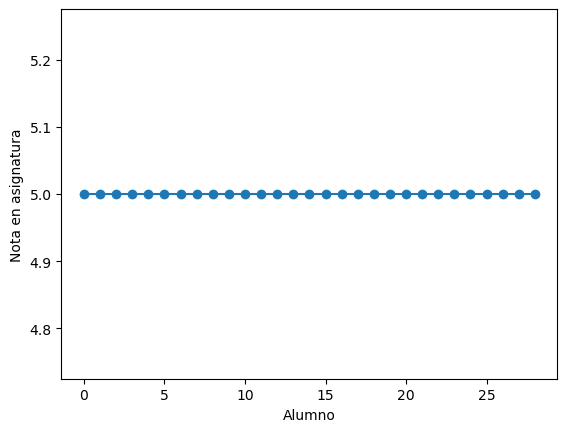

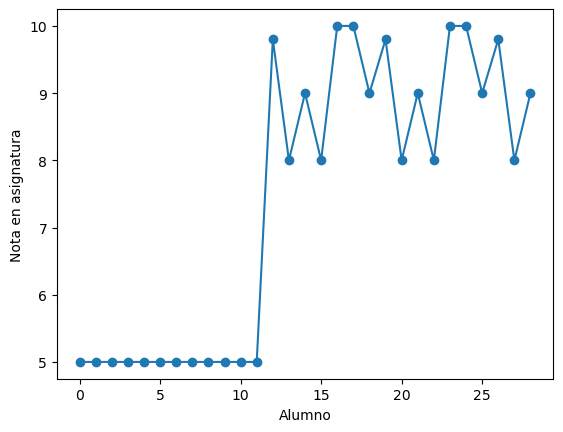

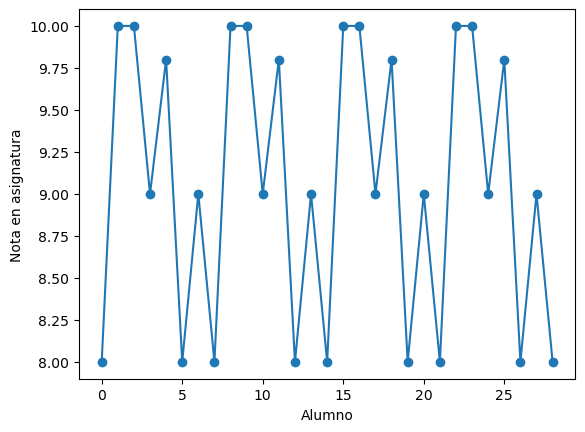

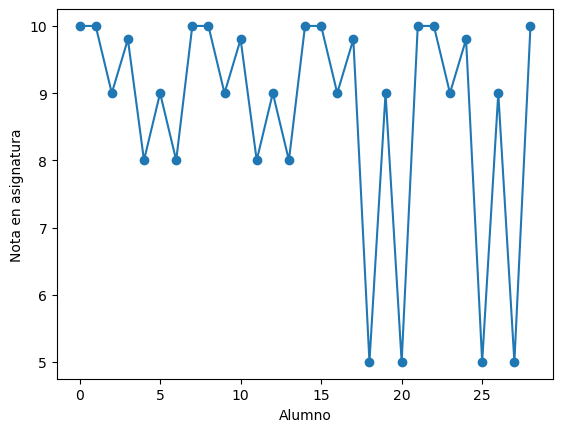

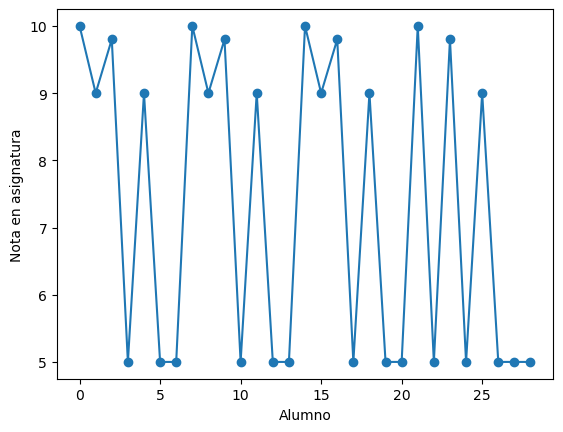

In [17]:
notas=df2.values.tolist()
import matplotlib.pyplot as plt
plt.plot(notas,'o',color='red')
plt.xlabel('Alumno')
plt.ylabel('Nota en asignatura')

for i in asignaturas:
    plt.show()
    plt.plot(notas[29*(i):29*(i+1)],'o-')
    plt.xlabel('Alumno')
    plt.ylabel('Nota en asignatura')